In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px

# Change 'default' to the style that you want to try out
matplotlib.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)


# Microdados do ENEM 2019

O conjunto de dados utilizado é um recorte dos microdados do enem de 2019 disponibilizados pelo INEP em: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

O banco de dados utilizado será um recorte por estado que contém 500 observações com as seguintes variáveis:

* SG_UF_RESIDENCIA - Estado que o recorte foi feito
* NU_IDADE - Idade do candidato em anos
* TP_SEXO - Sexo biológico do candidato (F:feminino ou M:masculino)
* TP_ESTADO_CIVIL - Estado Civil do Candidato (1: Solteiro ou 2: Outros)
* TP_COR_RACA - (1: Branca/amarela ou 2:Preta/parda/indigena) 
* TP_ESCOLA - (1: Pública ou 2: Privada) 
* Q001 - Escolaridade do pai do Candidato (A: Fundamental, B: Médio, C: Superior ou D: Não informado)
* Q002 - Escolaridade da mãe do Candidato (A: Fundamental, B: Médio, C: Superior ou D: Não informado)
* Q005 - Quantas pessoas moram na mesma residência
* Q006 - A renda familiar Mensal (A: 1 SM, B: 1 a 2 SM, C:2 a 5 SM ou D: +5 SM)
* Q025 - Possuí acesso a internet em casa (A:Não, S:Sim)
* NU_MED - Nota média das provas

**O objetivo é determinar quais fatores influenciam a nota média dos candidatos do ENEM.**


In [2]:
enem = pd.read_csv("SP.csv") # Lê o banco de dados escolhidos (Substitua pelo banco escolhido)
enem.head(10) # Mostra as 10 primeiras observações   

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,Q001,Q002,Q005,Q006,Q025,NU_MED
0,SP,17,F,1,1,2,C,C,4,B,B,589.70
1,SP,17,F,1,1,2,C,C,4,D,B,575.10
2,SP,17,F,1,1,2,C,C,2,D,B,630.90
3,SP,18,M,1,1,2,B,B,3,C,B,635.20
4,SP,18,M,1,1,2,B,A,3,D,B,578.06
5,SP,17,F,1,2,1,A,A,6,C,B,404.60
6,SP,17,F,1,1,1,A,B,4,C,B,473.84
7,SP,17,F,1,1,1,A,A,8,B,B,482.42
8,SP,17,M,1,1,1,A,A,4,C,B,589.68
9,SP,17,M,1,2,1,A,B,5,D,B,602.06


## Exploração dos Dados

In [3]:
enem.info() #Mostra os tipos de variáveis no banco 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SG_UF_RESIDENCIA  500 non-null    object 
 1   NU_IDADE          500 non-null    int64  
 2   TP_SEXO           500 non-null    object 
 3   TP_ESTADO_CIVIL   500 non-null    int64  
 4   TP_COR_RACA       500 non-null    int64  
 5   TP_ESCOLA         500 non-null    int64  
 6   Q001              500 non-null    object 
 7   Q002              500 non-null    object 
 8   Q005              500 non-null    int64  
 9   Q006              500 non-null    object 
 10  Q025              500 non-null    object 
 11  NU_MED            500 non-null    float64
dtypes: float64(1), int64(5), object(6)
memory usage: 47.0+ KB


In [4]:
#Para alterar o tipo de uma variável, reescreva a variavél utilizando o .astype('tipo novo')
enem.TP_SEXO = enem.TP_SEXO.astype('category') #Exemplo mudando a variavel Sexo para categorica
enem.TP_ESTADO_CIVIL = enem.TP_ESTADO_CIVIL.astype('category')
enem.TP_COR_RACA = enem.TP_COR_RACA.astype('category')
enem.Q001 = enem.Q001.astype('category')
enem.Q002 = enem.Q002.astype('category')
enem.Q006 = enem.Q006.astype('category')
enem.Q025 = enem.Q025.astype('category')

enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SG_UF_RESIDENCIA  500 non-null    object  
 1   NU_IDADE          500 non-null    int64   
 2   TP_SEXO           500 non-null    category
 3   TP_ESTADO_CIVIL   500 non-null    category
 4   TP_COR_RACA       500 non-null    category
 5   TP_ESCOLA         500 non-null    int64   
 6   Q001              500 non-null    category
 7   Q002              500 non-null    category
 8   Q005              500 non-null    int64   
 9   Q006              500 non-null    category
 10  Q025              500 non-null    category
 11  NU_MED            500 non-null    float64 
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 24.2+ KB


### Variáveis quantitativas


<AxesSubplot:xlabel='NU_MED', ylabel='Count'>

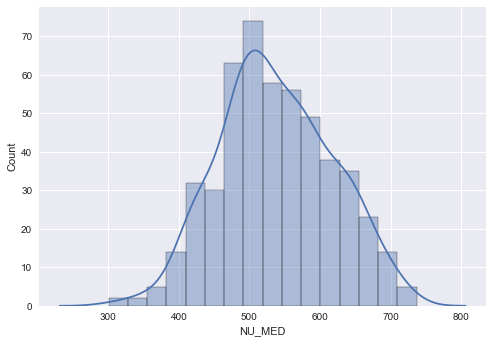

In [5]:
#Gerando histograma da variável resposta
sns.histplot(enem.NU_MED, alpha=0.4, kde=True, kde_kws={"cut": 3}) 

In [5]:
enem.describe().round(2) #Mostra as estatísticas sumarias das variaveis numéricas

,NU_IDADE,TP_ESCOLA,Q005,NU_MED
count,500.00,500.00,500.00,500.00
mean,17.45,1.26,3.93,537.77
std,1.91,0.44,1.20,80.02
min,16.00,1.00,2.00,300.18
25%,17.00,1.00,3.00,483.22
50%,17.00,1.00,4.00,531.23
75%,18.00,2.00,4.00,593.47
max,46.00,2.00,10.00,737.18


In [6]:
enem.isnull().values.any() #Verifica a existência de dados faltantes

False

In [7]:
enem[pd.isnull(enem).any(axis=1)] # Mostra as linhas com dados faltantes

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,Q001,Q002,Q005,Q006,Q025,NU_MED


In [8]:
#Avalia a correlação das variáveis numéricas
corr = enem.select_dtypes(include=['int64', 'float64']).corr() 
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,NU_IDADE,TP_ESCOLA,Q005,NU_MED
NU_IDADE,nan,nan,nan,nan
TP_ESCOLA,-0.04,nan,nan,nan
Q005,-0.07,-0.15,nan,nan
NU_MED,-0.05,0.48,-0.17,nan


### Variáveis Categóricas

In [9]:
enem.describe(include=['category']) #Mostra as estatísticas sumarias das variaveis categóricas

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,Q001,Q002,Q006,Q025
count,500,500,500,500,500,500,500
unique,2,2,2,4,4,4,2
top,F,1,1,B,B,C,B
freq,287,496,317,187,194,190,473


TP_SEXO
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: NU_MED, dtype: object

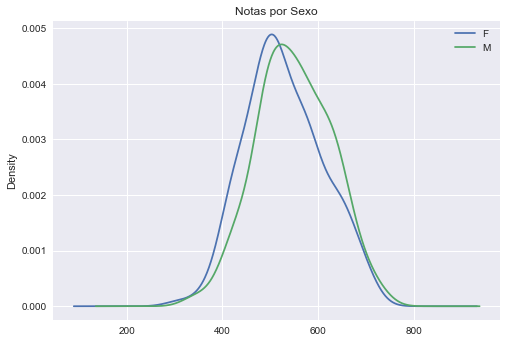

In [6]:
#gera um gráfico da variavel resposta de acordo com as categorias de interesse
enem.groupby('TP_SEXO').NU_MED.plot(kind='kde', legend=True, title='Notas por Sexo')

TP_COR_RACA
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: NU_MED, dtype: object

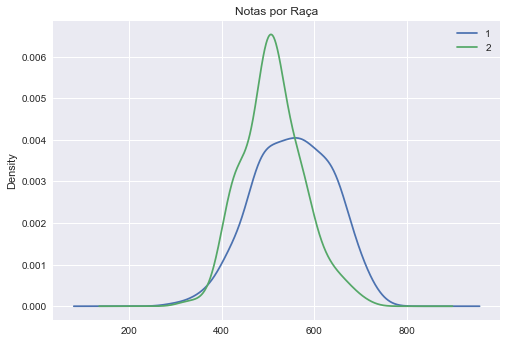

In [14]:
#gera um gráfico da variavel resposta de acordo com a raça de interesse
enem.groupby('TP_COR_RACA').NU_MED.plot(kind='kde', legend=True, title='Notas por Raça')

Q025
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
Name: NU_MED, dtype: object

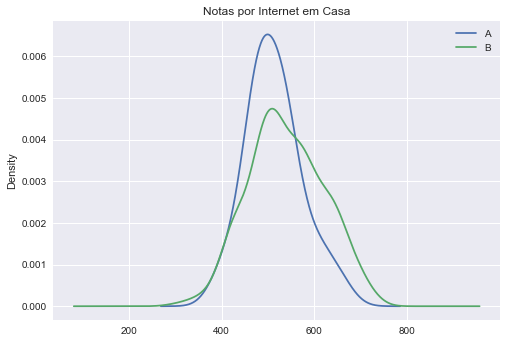

In [24]:
#gera um gráfico da variavel resposta de acordo com a internet em casa
enem.groupby('Q025').NU_MED.plot(kind='kde', legend=True, title='Notas por Internet em Casa')

<AxesSubplot:xlabel='TP_COR_RACA', ylabel='NU_MED'>

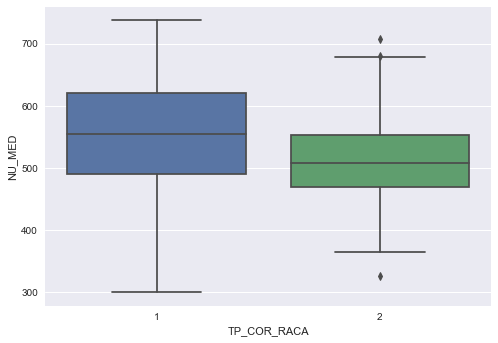

In [15]:
#gera um boxplot da variavel resposta de acordo com as categorias de interesse
sns.boxplot(x ='TP_COR_RACA',y = 'NU_MED', data = enem)

<AxesSubplot:xlabel='TP_SEXO', ylabel='NU_MED'>

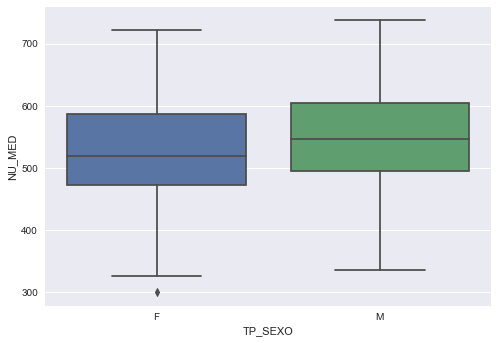

In [13]:
#gera um boxplot da variavel resposta de acordo com as categorias de interesse
sns.boxplot(x ='TP_SEXO',y = 'NU_MED', data = enem)

<AxesSubplot:xlabel='Q025', ylabel='NU_MED'>

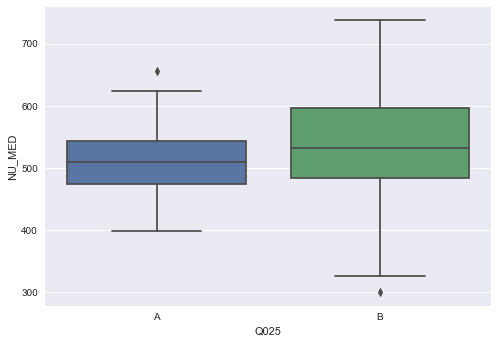

In [25]:
#gera um boxplot da variavel resposta de acordo com as categorias de interesse
sns.boxplot(x ='Q025',y = 'NU_MED', data = enem)

<AxesSubplot:xlabel='Q001', ylabel='NU_MED'>

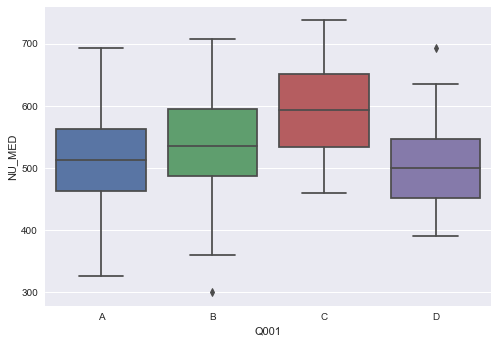

In [27]:
#gera um boxplot da variavel resposta de acordo com as categorias de interesse (Escolaridade do Pai do Candidato)
sns.boxplot(x ='Q001',y = 'NU_MED', data = enem)

<AxesSubplot:xlabel='Q002', ylabel='NU_MED'>

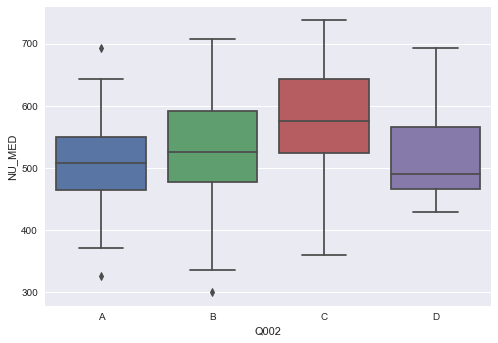

In [28]:
#gera um boxplot da variavel resposta de acordo com as categorias de interesse (Escolaridade da Mãe do Candidato)
sns.boxplot(x ='Q002',y = 'NU_MED', data = enem)

<AxesSubplot:xlabel='TP_ESCOLA', ylabel='NU_MED'>

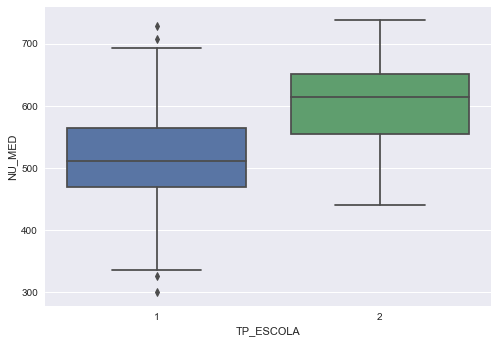

In [30]:
#gera um boxplot da variavel resposta de acordo com as categorias de interesse (Escola pública vs privada)
sns.boxplot(x ='TP_ESCOLA',y = 'NU_MED', data = enem)

<AxesSubplot:xlabel='Q006', ylabel='NU_MED'>

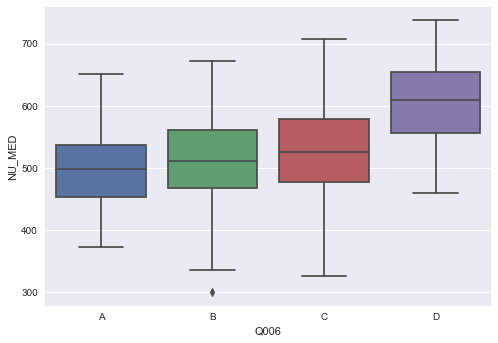

In [29]:
#gera um boxplot da variavel resposta de acordo com as categorias de interesse (Renda familiar Mensal)
sns.boxplot(x ='Q006',y = 'NU_MED', data = enem)

## Ajuste dos modelos de Regressão

Ajuste *3 modelos* de regressão, utilizando as variáveis que achar pertinentes na análise.

In [31]:
# Ajuste do Modelo1
modelo1 = smf.ols(formula = 'NU_MED ~ TP_ESCOLA + TP_SEXO', data = enem)
modelo1_fit = modelo1.fit()
modelo1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NU_MED   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     80.91
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           3.80e-31
Time:                        19:08:48   Log-Likelihood:                -2829.6
No. Observations:                 500   AIC:                             5665.
Df Residuals:                     497   BIC:                             5678.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      420.3308      9.748     43.120      0.000     401.178     439.483
TP_SEXO[T.M]    17.1055      6.305      2.713      0.007       4.718      29.493
TP_ESCOLA       87.5632      7.126     12.288      0.000      73.563     101.563
==============================================================================
Omnibus:                        0.526   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.637
Skew:                           0.038   Prob(JB):                        0.727
Kurtosis:                       2.842   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Ajuste do Modelo2
modelo2 = smf.ols(formula = 'NU_MED ~ NU_IDADE', data = enem)
modelo2_fit = modelo2.fit()
modelo2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NU_MED   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.188
Date:                Sun, 10 Jul 2022   Prob (F-statistic):              0.276
Time:                        18:06:21   Log-Likelihood:                -2899.5
No. Observations:                 500   AIC:                             5803.
Df Residuals:                     498   BIC:                             5811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    573.4267     32.909     17.425      0.000     508.769     638.084
NU_IDADE      -2.0428      1.874     -1.090      0.276      -5.725       1.640
==============================================================================
Omnibus:                        6.147   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.274
Skew:                           0.069   Prob(JB):                        0.118
Kurtosis:                       2.569   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Ajuste do Modelo3
modelo3 = smf.ols(formula = 'NU_MED ~ Q025', data = enem)
modelo3_fit = modelo3.fit()
modelo3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NU_MED   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.793
Date:                Sun, 10 Jul 2022   Prob (F-statistic):             0.0953
Time:                        18:19:46   Log-Likelihood:                -2898.7
No. Observations:                 500   AIC:                             5801.
Df Residuals:                     498   BIC:                             5810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    512.7844     15.372     33.359      0.000     482.583     542.986
Q025[T.B]     26.4141     15.805      1.671      0.095      -4.638      57.466
==============================================================================
Omnibus:                        5.048   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                3.622
Skew:                           0.049   Prob(JB):                        0.163
Kurtosis:                       2.595   Cond. No.                         8.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Análise de Diagnóstico do modelo

### Analise de Residuos

O resíduo em um modelo de regressão linear é definido como a diferença entre o valor observado e o valor ajustado da variável resposta.

$$e_{i} = y_{i} - {\hat{y}}_{i}$$
 
Suposições do modelo que devemos checar :

Só para lembrar, as suposições feitas no Modelo de Regressão Linear são:

* Existe uma relação linear entre x e y
* Os erros tem variância constante σ , isto é não depende de x
* Os erros são normalmente distribuídos
* Os erros são variáveis aleatórias independentes.

Então, a partir da observação dos resíduos, seremos capazes de diagnosticar alguns problemas no Modelo de Regressão Linear. São eles:

Não linearidade: ausência de uma relação linear entre x e y.
Heterocedasticidade: erros com variância σ não constante.
Não normalidade: erros não são normalmente distribuíıdos.


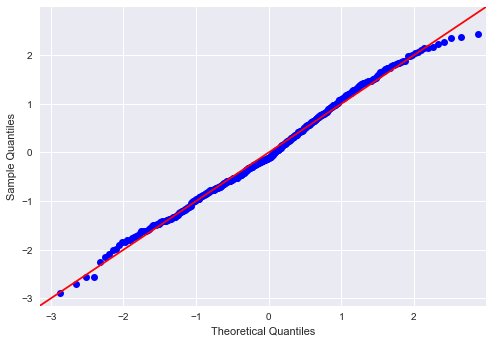

Statistics=0.994, p=0.035
Sample does not look Gaussian (reject H0)


In [16]:
from scipy import stats
from scipy.stats import shapiro

# GRÁFICO QQ - NORMALIDADE #

modelo_residuo = modelo1_fit.resid
modelo_y_ajustado = modelo1_fit.fittedvalues

sm.qqplot(modelo_residuo, line="45", fit=True,dist=stats.norm)
plt.show()

#Teste Shapiro-Wilk para normalidade dos residuos
stat, p = shapiro(modelo_residuo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretação
alpha = 0.05
if p > alpha:print('Sample looks Gaussian (fail to reject H0)')
else:print('Sample does not look Gaussian (reject H0)')

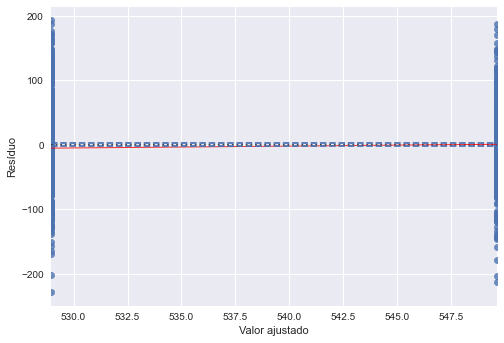

In [17]:
# GRÁFICO PARA LINEARIDADE E HOMOCEDASTICIDADE #

sns.residplot(modelo_y_ajustado, modelo_residuo, 
                          lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.axhline(y = 2, linestyle='dashed')
plt.axhline(y = -2, linestyle='dashed')
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()

In [18]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white


#Testes de Heterocedasticidade

#Breush-Pagan test:

name = ["Breusch pagan statistic", "p-value"]
test = sms.het_breuschpagan(modelo_residuo, modelo1_fit.model.exog)
print(lzip(name, test))
print()

#Goldfeld-Quandt test

name = ["Goldfeld-Quandt - statistic", "p-value"]
test = sms.het_goldfeldquandt(modelo_residuo, modelo1_fit.model.exog)
print(lzip(name, test))
print()

#White’s Test
name = ["White’s statistic", "p-value"]
test = het_white(modelo_residuo, modelo1_fit.model.exog)
print(lzip(name, test))
print()


[('Breusch pagan statistic', 0.45458241375134767), ('p-value', 0.5001668338714469)]

[('Goldfeld-Quandt - statistic', 0.8865481328212862), ('p-value', 0.8281668350241826)]

[('White’s statistic', 0.45458241375129216), ('p-value', 0.5001668338714731)]



## Análise de outliers e pontos influentes

In [19]:
from statsmodels.graphics.regressionplots import *

#https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.OLSInfluence.html#statsmodels.stats.outliers_influence.OLSInfluence
    
influence = modelo1_fit.get_influence()
inf_sum = influence.summary_frame().round(3)

#Algumas métricas de avaliação de de pontos influentes.
print(inf_sum.head(10))

   dfb_Intercept  dfb_TP_SEXO[T.M]  cooks_d  standard_resid  hat_diag  \
0          0.045            -0.030    0.001           0.766     0.003   
1          0.034            -0.022    0.001           0.582     0.003   
2          0.076            -0.050    0.003           1.286     0.003   
3          0.000             0.056    0.003           1.079     0.005   
4          0.000             0.019    0.000           0.358     0.005   
5         -0.093             0.061    0.004          -1.568     0.003   
6         -0.041             0.027    0.001          -0.695     0.003   
7         -0.035             0.023    0.001          -0.587     0.003   
8          0.000             0.026    0.001           0.505     0.005   
9          0.000             0.034    0.001           0.661     0.005   

   dffits_internal  student_resid  dffits  
0            0.045          0.766   0.045  
1            0.034          0.582   0.034  
2            0.076          1.287   0.076  
3            0.074  

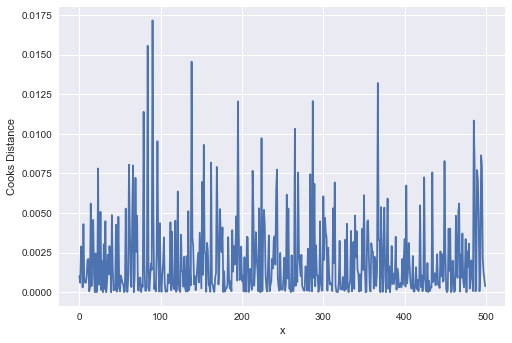

In [20]:
#Avaliação da Distancia de Coock para identificar pontos influentes
cooks = influence.cooks_distance
X = enem[['NU_IDADE']]

plt.plot(cooks[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

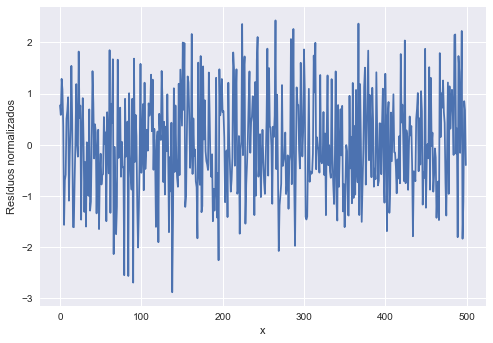

In [21]:
#Avaliação dos residuos Studentizados para identificar pontos influentes
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel('x')
plt.ylabel('Resíduos normalizados')
plt.show()

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Cria um banco de dados para verificar a inflação da variancia pelas variavéis
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(modelo1_fit.model.exog, i) for i in range(1, modelo1_fit.model.exog.shape[1])]
vif["Variable"]   = modelo1_fit.model.exog_names[1:]
print(vif)

   VIF Factor      Variable
0         1.0  TP_SEXO[T.M]


## Algumas transformações que podem ser uteis


In [23]:
#Importando as funções de pré processamento
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

#Criando a varial Media padronizada
enem["MED_SD"] = StandardScaler().fit(enem[['NU_MED']]).transform(enem[['NU_MED']])

#Codificação ordinal para escolaridade do Pai
enem["Q001_Dummy"] = OrdinalEncoder().fit(enem[['Q001']]).transform(enem[['Q001']]) #Codifica a variavel de n niveis em n variaveis

#Discretizando a variavel sexo com OneHotEncoder
sexo = OneHotEncoder().fit_transform(enem[['TP_SEXO']]).toarray() #Codifica a variavel de n niveis em n variaveis
sexo = pd.DataFrame(sexo) #Transforma essas novas variaveis em um dataframe
sexo.rename(columns = {0:'Feminino', 1:'Masculino'}, inplace = True) #Atribui nome pra identificação
enem = pd.concat([enem, sexo], axis=1, join='inner') #Concatena o banco o original com as variaveis criadas na codificação

enem.head(10)

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,Q001,Q002,Q005,Q006,Q025,NU_MED,MED_SD,Q001_Dummy,Feminino,Masculino
0,SP,17,F,1,1,2,C,C,4,B,B,589.70,0.649602,2.0,1.0,0.0
1,SP,17,F,1,1,2,C,C,4,D,B,575.10,0.466960,2.0,1.0,0.0
2,SP,17,F,1,1,2,C,C,2,D,B,630.90,1.165002,2.0,1.0,0.0
3,SP,18,M,1,1,2,B,B,3,C,B,635.20,1.218794,1.0,0.0,1.0
4,SP,18,M,1,1,2,B,A,3,D,B,578.06,0.503989,1.0,0.0,1.0
5,SP,17,F,1,2,1,A,A,6,C,B,404.60,-1.665946,0.0,1.0,0.0
6,SP,17,F,1,1,1,A,B,4,C,B,473.84,-0.799773,0.0,1.0,0.0
7,SP,17,F,1,1,1,A,A,8,B,B,482.42,-0.692440,0.0,1.0,0.0
8,SP,17,M,1,1,1,A,A,4,C,B,589.68,0.649352,0.0,0.0,1.0
9,SP,17,M,1,2,1,A,B,5,D,B,602.06,0.804222,0.0,0.0,1.0
